In [2]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
%%time
data = pd.read_csv('drive/MyDrive/Major Project/dataset.csv', index_col = 'Index')

CPU times: user 38.6 s, sys: 5.26 s, total: 43.8 s
Wall time: 1min 3s


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5956842 entries, 0 to 5956841
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float64
 1   Iron                    float64
 2   Nitrate                 float64
 3   Chloride                float64
 4   Lead                    float64
 5   Zinc                    float64
 6   Color                   object 
 7   Turbidity               float64
 8   Fluoride                float64
 9   Copper                  float64
 10  Odor                    float64
 11  Sulfate                 float64
 12  Conductivity            float64
 13  Chlorine                float64
 14  Manganese               float64
 15  Total Dissolved Solids  float64
 16  Source                  object 
 17  Water Temperature       float64
 18  Air Temperature         float64
 19  Month                   object 
 20  Day                     float64
 21  Time of Day             float64
 22 

In [ ]:
data.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [8]:
# First let us focus on handling the missing values
def missing(df):
  print(df.isnull().sum())

  df = df.dropna()
  return df.reset_index(drop = True)


In [9]:
# Convert the string input to categorical form
def cat(df):
  for label, content in df.items():
    if not pd.api.types.is_any_real_numeric_dtype(content):
      print(label)
      df[label] = content.astype('category').cat.as_ordered()
      df[label] = df[label].cat.codes
  return df


In [10]:
# optimise the datatype
def opt(df):
  for col in df.columns:
    col_type = df[col].dtype

    if col_type == 'float64' or col_type == 'float32':
      df[col] = pd.to_numeric(df[col], downcast = 'float')

    elif col_type == 'int64' or col_type == 'int32':
      df[col] = pd.to_numeric(df[col], downcast = 'integer')

  return df

In [11]:
# The function takes care of the duplicate values
def dupli(df):
  print(df.duplicated().sum())
  df = df.drop_duplicates()
  return df.reset_index(drop = True)

In [12]:
# The function standardises the values to make them comparable.
def standard(df):
  X= df.drop('Target', axis = 1)
  y = df.Target

  scaler = StandardScaler()

  x_scaled =scaler.fit_transform(X)

  X_scaled_df = pd.DataFrame(x_scaled, columns = X.columns)
  return X_scaled_df, y

In [13]:
# The purpose of this function is to perform Linear Discrimination Analysis
def LDA(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X,
                                                      y,
                                                      test_size =0.2,
                                                      random_state = 42)

  lda = LinearDiscriminantAnalysis()

  X_train_lda = lda.fit_transform(X_train, y_train)
  X_test_lda = lda.transform(X_test)


  print(f"Number of components after LDA: {X_train_lda.shape[1]}")
  return X_train_lda, X_test_lda, y_train, y_test, lda

In [14]:
data = missing(data)
data = cat(data)
data = opt(data)
data = dupli(data)

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64
Color
Source
Month
109989


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871811 entries, 0 to 3871810
Data columns (total 23 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float32
 1   Iron                    float32
 2   Nitrate                 float32
 3   Chloride                float32
 4   Lead                    float32
 5   Zinc                    float32
 6   Color                   int8   
 7   Turbidity               float32
 8   Fluoride                float32
 9   Copper                  float32
 10  Odor                    float32
 11  Sulfate                 float32
 12  Conductivity            float32
 13  Chlorine                float32
 14  Manganese               float32
 15  Total Dissolved Solids  float32
 16  Source                  int8   
 17  Water Temperature       float32
 18  Air Temperature         float32
 19  Month                   int8   
 20  Day                     float32
 21  Time of Day             float32

In [21]:
data.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,6.917863,8.053827e-05,3.734167,227.029846,0.0,1.245317,1,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641998,2,15.348981,71.220589,9,26.0,16.0,0
1,5.443762,2.010586e-02,3.816994,230.995636,0.0,0.528280,2,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054077,4,11.643467,44.891331,4,31.0,8.0,0
2,8.091909,2.167128e-03,9.925788,186.540878,0.0,3.807511,2,0.004867,0.222912,0.616574,...,3.177850,3.296139e-03,168.075546,5,15.249415,69.336670,6,29.0,7.0,0
3,7.258203,6.107130e-09,9.261676,182.242340,0.0,0.416478,0,0.047803,1.016196,0.298093,...,2.325094,6.020679e-16,214.553101,4,15.891905,61.139141,0,11.0,4.0,0
4,7.100650,3.019038e-03,3.620641,157.043930,0.0,0.112994,0,0.050613,0.842107,0.391602,...,2.284971,8.840612e-07,113.909073,4,11.899376,14.010267,0,7.0,12.0,0


In [23]:
data.to_csv('drive/MyDrive/Major Project/data_processed.csv', index = False)

In [24]:
%%time
df = pd.read_csv('drive/MyDrive/Major Project/data_processed.csv')

CPU times: user 12.9 s, sys: 1.86 s, total: 14.7 s
Wall time: 15.8 s


In [49]:
columns = ['Color', 'Source', 'Time of Day', 'Day', 'Month']
df.drop(columns = columns, inplace = True)

In [50]:
df.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
0,6.917863,8.053827e-05,3.734167,227.029846,0.0,1.245317,0.019007,0.622874,0.437835,1.686049,144.010986,432.844910,3.292038,8.024076e-07,284.641998,15.348981,71.220589,0
1,5.443762,2.010586e-02,3.816994,230.995636,0.0,0.528280,0.319956,0.423423,0.431588,3.414619,275.702118,990.201233,3.560224,7.007989e-02,570.054077,11.643467,44.891331,0
2,8.091909,2.167128e-03,9.925788,186.540878,0.0,3.807511,0.004867,0.222912,0.616574,0.795310,175.275177,385.025848,3.177850,3.296139e-03,168.075546,15.249415,69.336670,0
3,7.258203,6.107130e-09,9.261676,182.242340,0.0,0.416478,0.047803,1.016196,0.298093,3.144199,114.551430,160.062561,2.325094,6.020679e-16,214.553101,15.891905,61.139141,0
4,7.100650,3.019038e-03,3.620641,157.043930,0.0,0.112994,0.050613,0.842107,0.391602,2.713379,167.417831,583.295349,2.284971,8.840612e-07,113.909073,11.899376,14.010267,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3871811 entries, 0 to 3871810
Data columns (total 18 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   pH                      float32
 1   Iron                    float32
 2   Nitrate                 float32
 3   Chloride                float32
 4   Lead                    float32
 5   Zinc                    float32
 6   Turbidity               float32
 7   Fluoride                float32
 8   Copper                  float32
 9   Odor                    float32
 10  Sulfate                 float32
 11  Conductivity            float32
 12  Chlorine                float32
 13  Manganese               float32
 14  Total Dissolved Solids  float32
 15  Water Temperature       float32
 16  Air Temperature         float32
 17  Target                  int8   
dtypes: float32(17), int8(1)
memory usage: 254.8 MB


In [52]:
df = opt(df)

In [54]:
# df.info()

In [55]:
X, y = standard(df)

In [56]:
X_train, X_test, y_train, y_test, lda = LDA(X,y)

Number of components after LDA: 1


In [57]:
len(X_train)

3097448

In [58]:
y_train.unique()

array([1, 0], dtype=int8)

In [59]:
feature_names = X.columns.to_list()

In [60]:
feature_names

['pH',
 'Iron',
 'Nitrate',
 'Chloride',
 'Lead',
 'Zinc',
 'Turbidity',
 'Fluoride',
 'Copper',
 'Odor',
 'Sulfate',
 'Conductivity',
 'Chlorine',
 'Manganese',
 'Total Dissolved Solids',
 'Water Temperature',
 'Air Temperature']

In [61]:
def Access_Feature_Coefficients(lda, feature_names):
    # Extract LDA coefficients
    lda_coefficients = lda.scalings_

    # Compute overall importance as the sum of absolute coefficients
    overall_importance = np.sum(np.abs(lda_coefficients), axis=1)

    # Create a DataFrame with only two columns: Feature and Overall_Importance
    feature_contributions = pd.DataFrame({
        "Feature": feature_names,
        "Overall_Importance": overall_importance
    })

    # Sort the DataFrame by Overall_Importance in descending order
    sorted_features = feature_contributions.sort_values(
        by="Overall_Importance",
        ascending=False
    )

    return sorted_features

In [65]:
sorted_features = Access_Feature_Coefficients(lda, feature_names).reset_index(drop = True)

In [67]:
sorted_features

,Feature,Overall_Importance
0,Turbidity,0.368417
1,Copper,0.349304
2,Chloride,0.330123
3,Manganese,0.297059
4,Fluoride,0.266602
5,Nitrate,0.263913
6,Iron,0.258038
7,Odor,0.250301
8,Chlorine,0.226560
9,Sulfate,0.195522


In [68]:
sorted_features.to_csv('drive/MyDrive/Major Project/sorted_features.csv', index = False)

In [81]:
df.to_csv('drive/MyDrive/Major Project/data_processed_LDA.csv', index = False)

In case the notebook reconnects, start compiling from here


In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
%%time
data = pd.read_csv('drive/MyDrive/Major Project/data_processed_LDA.csv')

CPU times: user 11.5 s, sys: 1.39 s, total: 12.9 s
Wall time: 17.2 s


In [4]:
%%time
sorted_features = pd.read_csv('drive/MyDrive/Major Project/sorted_features.csv')

CPU times: user 6.76 ms, sys: 1.21 ms, total: 7.97 ms
Wall time: 647 ms


In [5]:
data.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Target
0,6.917863,8.053827e-05,3.734167,227.02985,0.0,1.245317,0.019007,0.622874,0.437835,1.686049,144.01099,432.84490,3.292038,8.024076e-07,284.64200,15.348981,71.220590,0
1,5.443762,2.010586e-02,3.816994,230.99564,0.0,0.528280,0.319956,0.423423,0.431588,3.414619,275.70212,990.20123,3.560224,7.007989e-02,570.05410,11.643467,44.891330,0
2,8.091909,2.167128e-03,9.925788,186.54088,0.0,3.807511,0.004867,0.222912,0.616574,0.795310,175.27518,385.02585,3.177850,3.296139e-03,168.07555,15.249415,69.336670,0
3,7.258203,6.107130e-09,9.261676,182.24234,0.0,0.416478,0.047803,1.016196,0.298093,3.144199,114.55143,160.06256,2.325094,6.020680e-16,214.55310,15.891905,61.139140,0
4,7.100650,3.019038e-03,3.620642,157.04393,0.0,0.112994,0.050613,0.842107,0.391602,2.713379,167.41783,583.29535,2.284971,8.840612e-07,113.90907,11.899376,14.010267,0


In [6]:
X = data.drop('Target', axis = 1)
y = data.Target

In [7]:
sorted_features.head(10)

,Feature,Overall_Importance
0,Turbidity,0.368417
1,Copper,0.349304
2,Chloride,0.330123
3,Manganese,0.297059
4,Fluoride,0.266602
5,Nitrate,0.263913
6,Iron,0.258038
7,Odor,0.250301
8,Chlorine,0.226560
9,Sulfate,0.195522


In [8]:
sorted_features.Overall_Importance.sum()

3.174621483905778

In [9]:
def log_reg(X, y, sorted_features, n_features, epochs=10, batch_size=50000, test_size=0.2, random_state=42):
    """
    Trains an SGDClassifier with log loss using batching and computes evaluation metrics.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.array): Target vector.
        sorted_features (pd.DataFrame): DataFrame with feature names and their importance scores.
        n_features (int): Number of top features to select.
        epochs (int): Number of epochs for training. Default is 10.
        batch_size (int): Batch size for partial_fit. Default is 50,000.
        test_size (float): Proportion of test data. Default is 0.2.
        random_state (int): Random state for reproducibility. Default is 42.

    Returns:
        None. Prints classification metrics and displays a confusion matrix.
    """
    # Select top n features based on Overall_Importance
    top_features = sorted_features.nlargest(n_features, 'Overall_Importance').Feature.to_list()
    print(f"Selected Top {n_features} Features: {top_features}")

    # Filter the dataset to use only the selected features
    X_6 = X[top_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=test_size, random_state=random_state)

    # Compute class weights for imbalanced data
    classes = np.unique(y_train)
    class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weight_dict = dict(zip(classes, class_weights))

    # Initialize SGDClassifier
    model = SGDClassifier(loss='log_loss',
                          penalty='elasticnet',
                          tol=1e-3,
                          learning_rate='optimal',
                          eta0=0.01,
                          random_state=random_state)

    # Training with batching
    for epoch in tqdm(range(epochs), desc="Epoch Progress", unit="epoch"):
        for i in tqdm(range(0, len(X_train), batch_size),
                      desc="Batch Progress",
                      unit="batch",
                      leave=False):
            X_batch = X_train.iloc[i:i + batch_size]
            y_batch = y_train.iloc[i:i + batch_size]

            model.partial_fit(X_batch,
                              y_batch,
                              classes=classes,
                              sample_weight=[class_weight_dict[cls] for cls in y_batch])

    # Make predictions
    y_pred = model.predict(X_test)

    # Classification report
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics using standard libraries
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    f1 = f1_score(y_test, y_pred)

    # Metrics calculated using formulas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy    : {accuracy:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1 Score    : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


Selected Top 7 Features: ['Turbidity', 'Copper', 'Chloride', 'Manganese', 'Fluoride', 'Nitrate', 'Iron']


Epoch Progress: 100%|██████████| 10/10 [00:24<00:00,  2.45s/epoch]



Classification Report
              precision    recall  f1-score   support

           0       0.78      0.93      0.85    540743
           1       0.72      0.40      0.51    233620

    accuracy                           0.77    774363
   macro avg       0.75      0.67      0.68    774363
weighted avg       0.76      0.77      0.75    774363


Evaluation Metrics:
Accuracy    : 0.7727
Precision   : 0.7247
Recall/Sensitivity: 0.3975
Specificity : 0.9348
F1 Score    : 0.5134


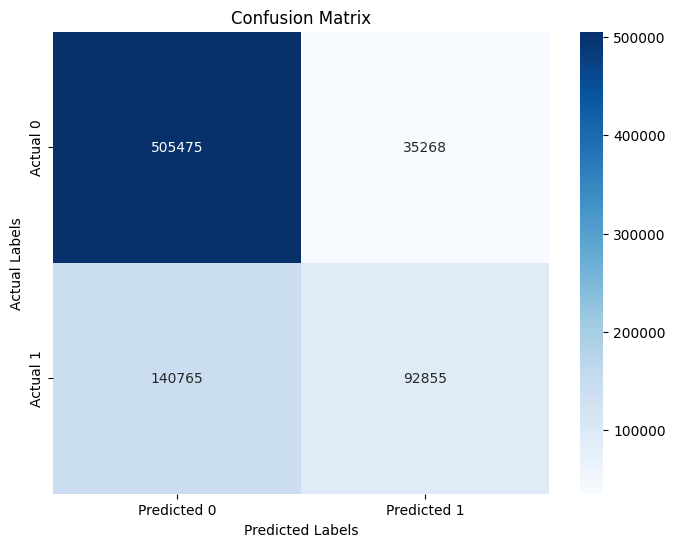

In [10]:
log_reg(X = X,
        y = y,
        n_features = 7,
        sorted_features = sorted_features)

In [11]:
def svm(X, y, sorted_features, n_features, epochs=10, batch_size=50000, test_size=0.2, random_state=42):
    """
    Trains an SGDClassifier with hinge loss (SVM) using batching and computes evaluation metrics.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.array): Target vector.
        sorted_features (pd.DataFrame): DataFrame with feature names and their importance scores.
        n_features (int): Number of top features to select.
        epochs (int): Number of epochs for training. Default is 10.
        batch_size (int): Batch size for partial_fit. Default is 50,000.
        test_size (float): Proportion of test data. Default is 0.2.
        random_state (int): Random state for reproducibility. Default is 42.

    Returns:
        None. Prints classification metrics and displays a confusion matrix.
    """
    # Select top n features based on Overall_Importance
    top_features = sorted_features.nlargest(n_features, 'Overall_Importance').Feature.to_list()
    print(f"Selected Top {n_features} Features: {top_features}")

    # Filter the dataset to use only the selected features
    X_6 = X[top_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=test_size, random_state=random_state)

    # Compute class weights for imbalanced data
    classes = np.unique(y_train)
    class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
    class_weight_dict = dict(zip(classes, class_weights))

    # Initialize SGDClassifier with hinge loss for SVM
    model = SGDClassifier(loss='hinge',  # hinge loss for SVM
                          penalty='elasticnet',
                          tol=1e-3,
                          learning_rate='optimal',
                          eta0=0.01,
                          random_state=random_state)

    # Training with batching
    for epoch in tqdm(range(epochs), desc="Epoch Progress", unit="epoch"):
        for i in tqdm(range(0, len(X_train), batch_size),
                      desc="Batch Progress",
                      unit="batch",
                      leave=False):
            X_batch = X_train.iloc[i:i + batch_size]
            y_batch = y_train.iloc[i:i + batch_size]

            model.partial_fit(X_batch,
                              y_batch,
                              classes=classes,
                              sample_weight=[class_weight_dict[cls] for cls in y_batch])

    # Make predictions
    y_pred = model.predict(X_test)

    # Classification report
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics using standard libraries
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    f1 = f1_score(y_test, y_pred)

    # Metrics calculated using formulas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy    : {accuracy:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1 Score    : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


Selected Top 7 Features: ['Turbidity', 'Copper', 'Chloride', 'Manganese', 'Fluoride', 'Nitrate', 'Iron']


Epoch Progress: 100%|██████████| 10/10 [00:21<00:00,  2.14s/epoch]



Classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.85    540743
           1       0.72      0.42      0.53    233620

    accuracy                           0.78    774363
   macro avg       0.76      0.67      0.69    774363
weighted avg       0.77      0.78      0.76    774363


Evaluation Metrics:
Accuracy    : 0.7762
Precision   : 0.7230
Recall/Sensitivity: 0.4188
Specificity : 0.9307
F1 Score    : 0.5304


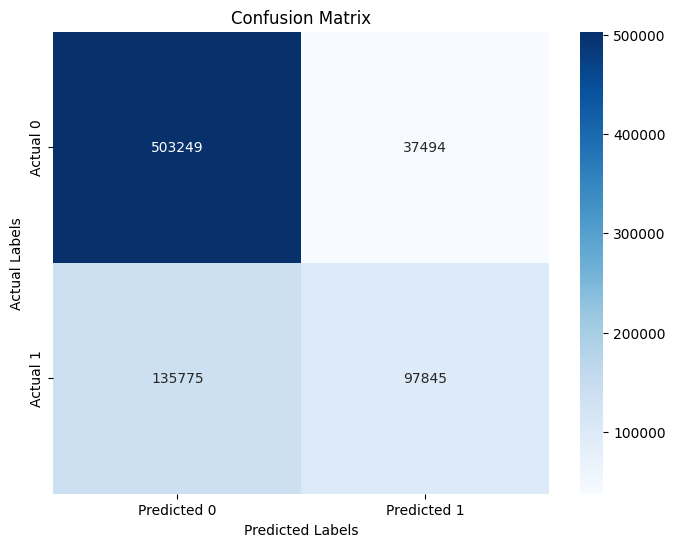

In [12]:
svm(X = X,
    y = y,
    n_features = 7,
    sorted_features = sorted_features)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.under_sampling import RandomUnderSampler

def KNN(X, y, sorted_features, n_features, n_neighbors=5, test_size=0.2, random_state=42, metric='minkowski'):
    """
    Trains a K-Nearest Neighbors (KNN) model and computes evaluation metrics.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.array): Target vector.
        sorted_features (pd.DataFrame): DataFrame with feature names and their importance scores.
        n_features (int): Number of top features to select.
        n_neighbors (int): Number of neighbors for KNN. Default is 5.
        test_size (float): Proportion of test data. Default is 0.2.
        random_state (int): Random state for reproducibility. Default is 42.
        metric (str): Distance metric for KNN. Default is 'minkowski'.

    Returns:
        None. Prints classification metrics and displays a confusion matrix.
    """
    # Select top n features based on Overall_Importance
    top_features = sorted_features.nlargest(n_features, 'Overall_Importance').Feature.to_list()
    print(f"Selected Top {n_features} Features: {top_features}")

    # Filter the dataset to use only the selected features
    X_6 = X[top_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=test_size, random_state=random_state)

    # Perform random undersampling to handle class imbalance
    rus = RandomUnderSampler(random_state=random_state)
    X_train, y_train = rus.fit_resample(X_train, y_train)

    # Initialize KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=n_neighbors,
                                  metric=metric,
                                  p=2,  # p=2 for Euclidean distance
                                  weights='distance')  # Weight by distance

    print('Starting model training...')
    model.fit(X_train, y_train)
    print('Model training complete.')

    # Make predictions
    print('starting with predictions.')
    y_pred = model.predict(X_test)
    print('completed predictions.')

    # Classification report
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics using standard libraries
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    f1 = f1_score(y_test, y_pred)

    # Metrics calculated using formulas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy    : {accuracy:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1 Score    : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


Selected Top 7 Features: ['Turbidity', 'Copper', 'Chloride', 'Manganese', 'Fluoride', 'Nitrate', 'Iron']
Starting model training...
Model training complete.
starting with predictions.
completed predictions.

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.86      0.87    540743
           1       0.69      0.75      0.72    233620

    accuracy                           0.82    774363
   macro avg       0.79      0.80      0.80    774363
weighted avg       0.83      0.82      0.83    774363


Evaluation Metrics:
Accuracy    : 0.8238
Precision   : 0.6934
Recall/Sensitivity: 0.7459
Specificity : 0.8575
F1 Score    : 0.7187


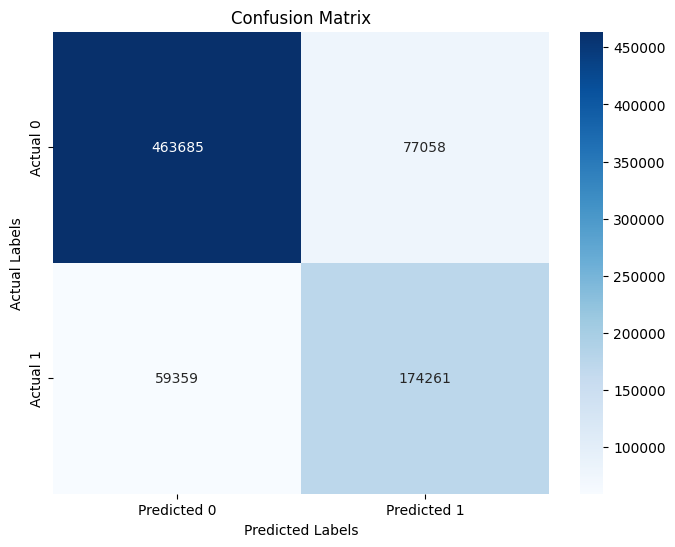

CPU times: user 3min 52s, sys: 939 ms, total: 3min 53s
Wall time: 3min 54s


In [14]:
%%time
KNN(X = X,
    y = y,
    n_features = 7,
    sorted_features = sorted_features,
    n_neighbors = 7,
    metric = 'euclidean')

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

def random_forest(X, y, sorted_features, n_features, target_rows=300000,
                  n_estimators=100, max_depth=None, test_size=0.2, random_state=42):
    """
    Reduces dataset size, trains a Random Forest model, calculates evaluation metrics,
    and displays a confusion matrix.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.array): Target vector.
        sorted_features (pd.DataFrame): DataFrame with feature names and their importance scores.
        n_features (int): Number of top features to select.
        target_rows (int): Target number of rows after reduction. Default is 100,000.
        n_estimators (int): Number of trees in the forest. Default is 100.
        max_depth (int or None): Maximum depth of the trees. Default is None.
        test_size (float): Proportion of test data. Default is 0.2.
        random_state (int): Random state for reproducibility. Default is 42.

    Returns:
        None. Prints classification metrics and displays a confusion matrix.
    """
    # Reduce the dataset to target_rows while maintaining class distribution
    data = X.copy()
    data['target'] = y
    data_resampled = resample(data,
                              replace=False,
                              n_samples=target_rows,
                              stratify=data['target'],
                              random_state=random_state)
    X = data_resampled.drop(columns=['target'])
    y = data_resampled['target']

    print(f"Dataset reduced to {target_rows} rows while maintaining class balance.")

    # Select top n features based on Overall_Importance
    top_features = sorted_features.nlargest(n_features, 'Overall_Importance').Feature.to_list()
    print(f"Selected Top {n_features} Features: {top_features}")

    # Filter the dataset to use only the selected features
    X_6 = X[top_features]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_6, y, test_size=test_size, random_state=random_state)

    # Initialize Random Forest Classifier
    model = RandomForestClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    random_state=random_state,
                                    class_weight="balanced")  # Handle class imbalance

    # Train the model
    print("Training Random Forest model...")
    model.fit(X_train, y_train)
    print("Training complete!")

    # Make predictions
    y_pred = model.predict(X_test)

    # Classification report
    print("\nClassification Report")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics using standard libraries
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)  # Sensitivity
    f1 = f1_score(y_test, y_pred)

    # Metrics calculated using formulas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy    : {accuracy:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1 Score    : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


Dataset reduced to 300000 rows while maintaining class balance.
Selected Top 7 Features: ['Turbidity', 'Copper', 'Chloride', 'Manganese', 'Fluoride', 'Nitrate', 'Iron']
Training Random Forest model...
Training complete!

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.86      0.90     41869
           1       0.73      0.86      0.79     18131

    accuracy                           0.86     60000
   macro avg       0.83      0.86      0.84     60000
weighted avg       0.87      0.86      0.86     60000


Evaluation Metrics:
Accuracy    : 0.8594
Precision   : 0.7265
Recall/Sensitivity: 0.8577
Specificity : 0.8602
F1 Score    : 0.7867


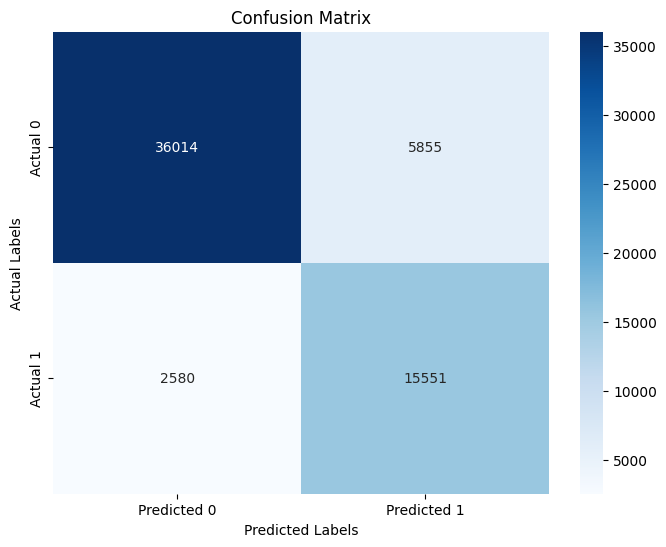

CPU times: user 2min 48s, sys: 423 ms, total: 2min 48s
Wall time: 2min 50s


In [21]:
%%time
random_forest(X = X,
              y = y,
              n_features = 7,
              sorted_features = sorted_features,
              n_estimators = 200,
              max_depth = 10)

In [18]:
import xgboost as xgb
from sklearn.utils import resample

def xg(X,
       y,
       sorted_features, n_features,
       target_rows=200000,
       n_estimators=100,
       early_stopping_rounds=10,
       test_size=0.2,
       random_state=42):
    """
    Reduces dataset size, trains an XGBoost model with early stopping, calculates evaluation metrics,
    and displays a confusion matrix.

    Parameters:
        X (pd.DataFrame): Feature matrix.
        y (pd.Series or np.array): Target vector.
        sorted_features (pd.DataFrame): DataFrame with feature names and their importance scores.
        n_features (int): Number of top features to select.
        target_rows (int): Target number of rows after reduction. Default is 200,000.
        n_estimators (int): Maximum number of trees in the model. Default is 100.
        early_stopping_rounds (int): Number of rounds to wait for improvement before stopping early. Default is 10.
        test_size (float): Proportion of test data. Default is 0.2.
        random_state (int): Random state for reproducibility. Default is 42.

    Returns:
        None. Prints classification metrics and displays a confusion matrix.
    """
    # Reduce the dataset to target_rows while maintaining class distribution
    data = X.copy()
    data['target'] = y
    data_resampled = resample(data,
                              replace=False,
                              n_samples=target_rows,
                              stratify=data['target'],
                              random_state=random_state)
    X = data_resampled.drop(columns=['target'])
    y = data_resampled['target']

    # Select top n features based on Overall_Importance
    top_features = sorted_features.nlargest(n_features, 'Overall_Importance').Feature.to_list()
    print(f"Selected Top {n_features} Features: {top_features}")

    # Filter the dataset to use only the selected features
    X = X[top_features]

    # Split data into training, validation, and testing sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

    # Create the DMatrix objects for XGBoost
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)
    dtest = xgb.DMatrix(X_test, label=y_test)

    # Specify XGBoost parameters
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'max_depth': 6,
        'eta': 0.1,
        'random_state': random_state
    }

    # Train the model with early stopping
    evals = [(dtrain, 'train'), (dval, 'eval')]
    model = xgb.train(params,
                      dtrain,
                      num_boost_round=n_estimators,
                      evals=evals,
                      early_stopping_rounds=early_stopping_rounds,
                      verbose_eval=True)

    print("\nTraining complete! Evaluating on the test set...")

    # Predict on the test set
    y_test_pred_prob = model.predict(dtest)
    y_test_pred = (y_test_pred_prob > 0.5).astype(int)

    # Classification report
    print("\nClassification Report")
    print(classification_report(y_test, y_test_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics using standard libraries
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred)
    recall = recall_score(y_test, y_test_pred)  # Sensitivity
    f1 = f1_score(y_test, y_test_pred)

    # Metrics calculated using formulas
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    # Print metrics
    print("\nEvaluation Metrics:")
    print(f"Accuracy    : {accuracy:.4f}")
    print(f"Precision   : {precision:.4f}")
    print(f"Recall/Sensitivity: {recall:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"F1 Score    : {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm,
                annot=True,
                fmt='d',
                cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title("Confusion Matrix")
    plt.show()


Selected Top 7 Features: ['Turbidity', 'Copper', 'Chloride', 'Manganese', 'Fluoride', 'Nitrate', 'Iron']
[0]	train-logloss:0.57127	eval-logloss:0.57234
[1]	train-logloss:0.53814	eval-logloss:0.53927
[2]	train-logloss:0.51112	eval-logloss:0.51219
[3]	train-logloss:0.48906	eval-logloss:0.49023
[4]	train-logloss:0.47060	eval-logloss:0.47184
[5]	train-logloss:0.45508	eval-logloss:0.45630
[6]	train-logloss:0.44219	eval-logloss:0.44349
[7]	train-logloss:0.43118	eval-logloss:0.43258
[8]	train-logloss:0.42184	eval-logloss:0.42332
[9]	train-logloss:0.41388	eval-logloss:0.41536
[10]	train-logloss:0.40722	eval-logloss:0.40878
[11]	train-logloss:0.40140	eval-logloss:0.40306
[12]	train-logloss:0.39644	eval-logloss:0.39820
[13]	train-logloss:0.39225	eval-logloss:0.39401
[14]	train-logloss:0.38865	eval-logloss:0.39049
[15]	train-logloss:0.38556	eval-logloss:0.38750
[16]	train-logloss:0.38294	eval-logloss:0.38495
[17]	train-logloss:0.38072	eval-logloss:0.38275
[18]	train-logloss:0.37877	eval-logloss:0

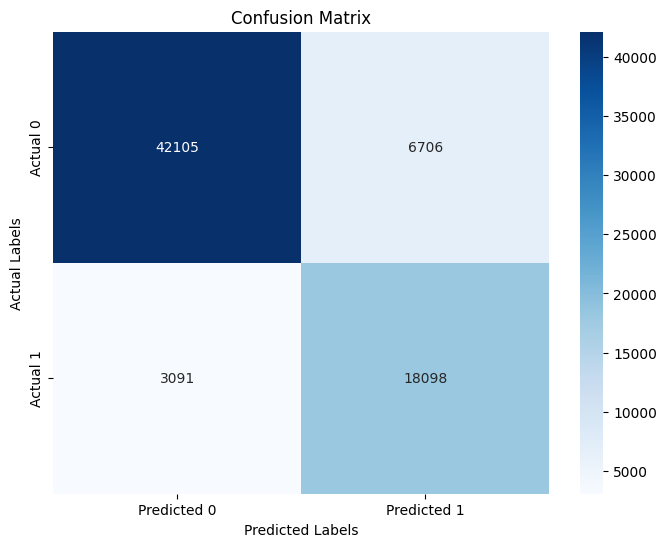

CPU times: user 12.9 s, sys: 404 ms, total: 13.3 s
Wall time: 9.65 s


In [19]:
%%time
xg(X=X,
   y=y,
   sorted_features = sorted_features,
   n_features = 7,
   target_rows = 700000,
   n_estimators = 100,
   early_stopping_rounds = 10)